# Predicting Fuel Efficiency of Passenger Vehicles

## Abstract

This paper analyzes two datasets of data about passenger vehicles. Each one is characterised by vehicle manufacturer, model, year of manufacturing, vehicle class (sedan, SUV, etc), engine displacement, number of cylinders, transmission type and number of gears, fuel type and finally - fuel consumption in the city, on the highway and combined. 

## Information

The main hypothesis is that the fuel consumption can be predicted with good enough accuracy based on just those features alone. While practical applications is limited as manufacturers provide this information anyways, the paper discusses and compares various ML techniques of regression/prediction and discusses the results.

Two datasets are used. They contain relatively similar information. However, several columns are renamed and/or dropped from each dataset to align it with the other one. Also, the fuel consumption in the second one is converted from MPG to L/100 KM.

## Dataset 1
https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

Corresponds to project file: Fuel_Consumption_2000-2022.csv

## Dataset 2
https://www.kaggle.com/datasets/epa/fuel-economy

Corresponds to project file: Vehicle_Fuel_Economy_Estimates_1984_2017.csv

## Related Articles

[Fuel Consumption Prediction Model using Machine Learning](https://thesai.org/Downloads/Volume12No11/Paper_46-Fuel_Consumption_Prediction_Model.pdf) is a paper that also tries to predict fuel consumption, but based on very different set of features. Support Vector Machine (SVM) to achieve prediction, but is aimed at predicting the fuel consumption of a particular vehicle, knowing parameters such as air intake temperature, engine load, throttle position, intake manifold pressure, etc. It achieves a very high R-squared score, but fundamentally solves a different problem than this project.

[Development of Machine Learning based approach to predict fuel fuel consumption and maintenance cost of Heavy-Duty Vehicles using diesel and alternative fuels](https://researchrepository.wvu.edu/cgi/viewcontent.cgi?article=12623&context=etd) is a very through examination of various machine learning algorithms, but in a different context.

## Methods

The following ML methods are compared:

* Linear Regression
* Ridge Regression with tuned hyperparameters
* Decision Tree Regression
* Random Forest Regression
* AdaBoost Regression
* Support Vector Regression
* k-Nearest Neighbors Regression
* Multi-Layer Perceptron Regression

### Feature Selection

The following features are included from each dataset: 

* Year
* Vehicle class (compact, SUV, etc)
* Engine size (displacement)
* Number of cylinders
* Transmission type and number of gears
* Fuel type
* Fuel consumption in the city (L/100 Km)
* Fuel consumption on the highway (L/100 Km)
* Combined fuel consumption (L/100 Km)

Some features are be dropped. For example:
* Manufacturer
* Model
* Emissions
* Diesel, natural gas and electric vehicles

Also, rows with zero/empty values are dropped as well as duplicates.

MPG values are converted to L/100 Km.

The columns from both datasets are renamed to a common name.

## Analyzing Both Datasets

Both datasets will be analyzed independently.

## Analyzing Run Time

The time it takes for each algorithm will be measured as well.

## Data Retrieval, Filtering, Mapping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

import time


For dataset 1 several columns are dropped and many are renamed for better presentation later.

In [2]:
# Get and filter dataset 1
ds1 = pd.read_csv('data/Fuel_Consumption_2000-2022.csv', sep = ',')

# Drop diesel, ethanol, and natural gas
ds1 = ds1[ds1['FUEL'] != 'E']
ds1 = ds1[ds1['FUEL'] != 'N']
ds1 = ds1[ds1['FUEL'] != 'D']

# It is easier to drop the columns/features that we don't need
ds1 = ds1.drop(columns=['MAKE', 'MODEL', 'COMB (mpg)', 'EMISSIONS'])

# Let's rename the columns to make them easier to work with and align with the other dataset
ds1.rename(columns={'VEHICLE CLASS': 'CLASS', 'FUEL CONSUMPTION' : 'CONSUMPTION CITY', 'HWY (L/100 km)' : 'CONSUMPTION HWY', 'COMB (L/100 km)' : 'CONSUMPTION COMB'}, inplace=True)

For dataset 2 diesel, natural gas and electric vehicles are excluded from the data. They represent a minority and will behave like outliers of left unfiltered. Several columns are also renamed to align them with dataset 1.

In [3]:
ds2 = pd.read_csv('data/Vehicle_Fuel_Economy_Estimates_1984_2017.csv', sep = ',')

# Drop diesel, natural gas and electric cars
ds2 = ds2[ds2['Fuel Type 1'] != 'Diesel']
ds2 = ds2[ds2['Fuel Type 1'] != 'Natural Gas']
ds2 = ds2[ds2['Fuel Type 2'] != 'Electricity']

# Filter only the columns/features that we need
ds2 = ds2[['Year', 'Class', 'Engine Displacement', 'Engine Cylinders', 'Transmission', 'Fuel Type 1', 'City MPG (FT1)', 'Highway MPG (FT1)', 'Combined MPG (FT1)']]

# Let's rename the columns to make them easier to work with and align them with the other dataset
ds2.rename(columns={'Year' : 'YEAR', 'Class': 'CLASS', 'Engine Displacement' : 'ENGINE SIZE', 'Engine Cylinders' : 'CYLINDERS', 'Transmission' : 'TRANSMISSION', 'Fuel Type 1' : 'FUEL'}, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_83088\2833152360.py:1: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types. Specify dtype option on import or set low_memory=False.
  ds2 = pd.read_csv('Vehicle_Fuel_Economy_Estimates_1984_2017.csv', sep = ',')


As dataset 2's data is in MPG, it needs to be converted into L/100 Km. The old columns will be removed and new ones will be created.

In [4]:
ds2['CONSUMPTION CITY'] = 235.214 / ds2['City MPG (FT1)']
ds2.drop(columns=['City MPG (FT1)'], inplace=True)

ds2['CONSUMPTION HWY'] = 235.214 / ds2['Highway MPG (FT1)']
ds2.drop(columns=['Highway MPG (FT1)'], inplace=True)

ds2['CONSUMPTION COMB'] = 235.214 / ds2['Combined MPG (FT1)']
ds2.drop(columns=['Combined MPG (FT1)'], inplace=True)


Now Nulls, N/As, and duplicates are filtered from both datasets.

In [5]:
ds1.dropna(inplace=True)
ds1.drop_duplicates(inplace=True)

ds2.dropna(inplace=True)
ds2.drop_duplicates(inplace=True)

Make sure that there are no missing values, nulls, and duplicated rows left in both datasets.

In [6]:
ds1.isna().sum().sum() + \
ds2.isna().sum().sum() + \
ds1.isnull().sum().sum() + \
ds2.isnull().sum().sum() + \
ds1.duplicated().sum() + \
ds2.duplicated().sum()

0

Get some idea what is the shape of the data that we will be working with:

In [7]:
print (ds1.shape)
print (ds2.shape)

(17565, 9)
(26333, 9)


### Visualizations of The Initial Data
Print data summary. This will include only the numerical features.

In [8]:
display(ds1.describe().transpose())
display(ds2.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
YEAR,17565.0,2011.567435,6.406348,2000.0,2006.0,2012.0,2017.0,2022.0
ENGINE SIZE,17565.0,3.215178,1.295386,0.9,2.0,3.0,3.9,8.4
CYLINDERS,17565.0,5.709650,1.818971,2.0,4.0,6.0,6.0,16.0
CONSUMPTION CITY,17565.0,12.264890,3.111186,3.5,10.2,11.9,14.0,30.6
CONSUMPTION HWY,17565.0,8.591529,1.959707,3.2,7.2,8.3,9.8,20.9
CONSUMPTION COMB,17565.0,10.612320,2.550244,3.6,8.9,10.3,12.1,26.1


,count,mean,std,min,25%,50%,75%,max
YEAR,26333.0,2001.243383,10.150510,1984.000000,1992.000000,2002.000000,2010.000000,2017.000000
ENGINE SIZE,26333.0,3.205947,1.306792,0.900000,2.200000,3.000000,4.000000,8.400000
CYLINDERS,26333.0,5.661679,1.770315,2.000000,4.000000,6.000000,6.000000,16.000000
CONSUMPTION CITY,26333.0,14.071335,3.609808,4.055414,11.760700,13.836118,15.680933,39.202333
CONSUMPTION HWY,26333.0,10.359195,2.665000,3.855967,8.400500,9.800583,11.760700,26.134889
CONSUMPTION COMB,26333.0,12.415041,3.131891,4.055414,10.226696,11.760700,13.836118,33.602000


Print some correlation statistics as well.

In [9]:
display(ds1.corr(numeric_only=True))
display(ds2.corr(numeric_only=True))

,YEAR,ENGINE SIZE,CYLINDERS,CONSUMPTION CITY,CONSUMPTION HWY,CONSUMPTION COMB
YEAR,1.000000,-0.091492,-0.096511,-0.135030,-0.022296,-0.098612
ENGINE SIZE,-0.091492,1.000000,0.911648,0.839066,0.757233,0.825295
CYLINDERS,-0.096511,0.911648,1.000000,0.826261,0.717747,0.802939
CONSUMPTION CITY,-0.135030,0.839066,0.826261,1.000000,0.925418,0.991265
CONSUMPTION HWY,-0.022296,0.757233,0.717747,0.925418,1.000000,0.966835
CONSUMPTION COMB,-0.098612,0.825295,0.802939,0.991265,0.966835,1.000000


,YEAR,ENGINE SIZE,CYLINDERS,CONSUMPTION CITY,CONSUMPTION HWY,CONSUMPTION COMB
YEAR,1.000000,0.074171,0.092738,-0.182184,-0.286790,-0.226944
ENGINE SIZE,0.074171,1.000000,0.899499,0.817087,0.722512,0.794991
CYLINDERS,0.092738,0.899499,1.000000,0.782671,0.646712,0.743362
CONSUMPTION CITY,-0.182184,0.817087,0.782671,1.000000,0.924151,0.983526
CONSUMPTION HWY,-0.286790,0.722512,0.646712,0.924151,1.000000,0.968346
CONSUMPTION COMB,-0.226944,0.794991,0.743362,0.983526,0.968346,1.000000


Visualization the engine displacement and combined fuel consumption from both datasets:

<Axes: xlabel='ENGINE SIZE', ylabel='CONSUMPTION COMB'>

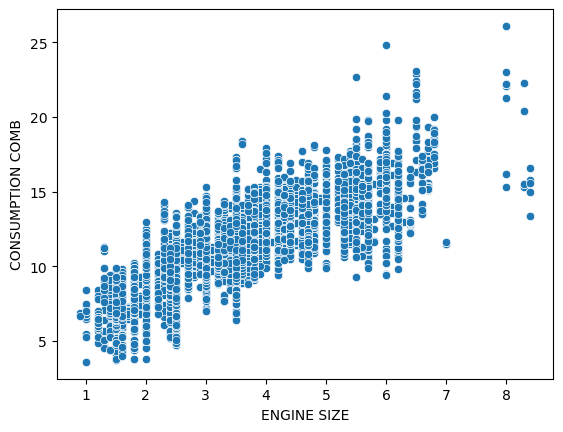

In [10]:
# Dataset 1
sns.scatterplot(x='ENGINE SIZE', y='CONSUMPTION COMB', data=ds1)

<Axes: xlabel='ENGINE SIZE', ylabel='CONSUMPTION COMB'>

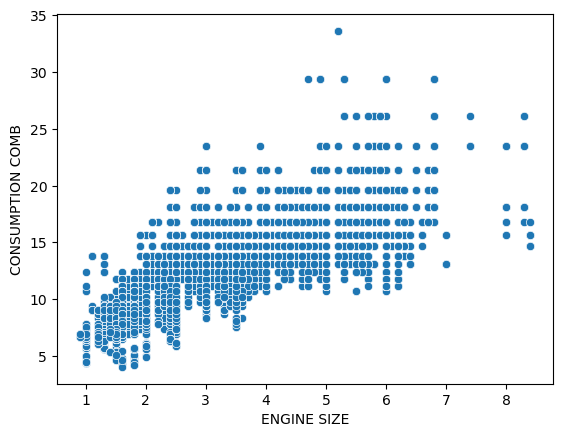

In [11]:
# Dataset 2
sns.scatterplot(x='ENGINE SIZE', y='CONSUMPTION COMB', data=ds2)

The data points from dataset 1 seems much more natural in distribution. There is some kind of quantization for dataset 2.

Visualization of a histogram of combined fuel consumption for both datasets:

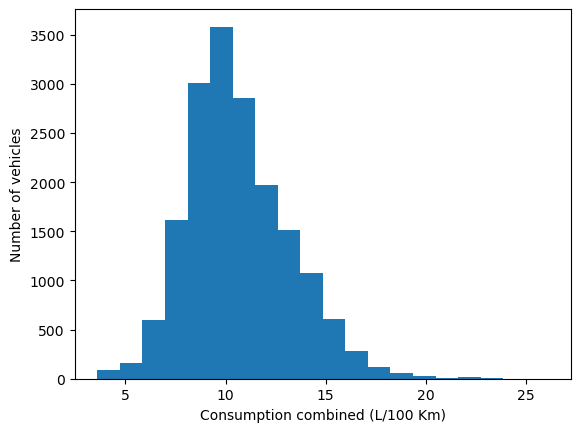

In [12]:
# Dataset 1
plt.hist(ds1['CONSUMPTION COMB'], bins=20)
plt.xlabel('Consumption combined (L/100 Km)')
plt.ylabel('Number of vehicles')
plt.show()

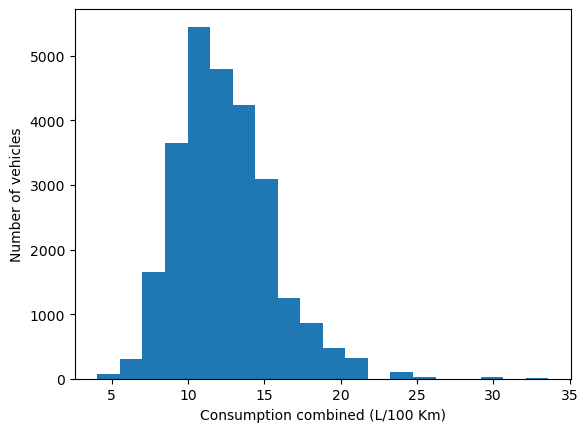

In [13]:
# Dataset 2
plt.hist(ds2['CONSUMPTION COMB'], bins=20)
plt.xlabel('Consumption combined (L/100 Km)')
plt.ylabel('Number of vehicles')
plt.show()

List of the unique vehicle classes from both datasets:

In [14]:
print('Dataset 1 unique vehicle classes:', ds1['CLASS'].unique())
print('Dataset 2 unique vehicle classes:', ds2['CLASS'].unique())

Dataset 1 unique vehicle classes: ['COMPACT' 'MID-SIZE' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'TWO-SEATER' 'STATION WAGON - SMALL' 'FULL-SIZE' 'SUV'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD'
 'PICKUP TRUCK - SMALL' 'MINIVAN' 'SUV - STANDARD'
 'SPECIAL PURPOSE VEHICLE' 'SUV - SMALL' 'Compact' 'SUV: Small'
 'Two-seater' 'Mid-size' 'Minicompact' 'Subcompact' 'Station wagon: Small'
 'Full-size' 'SUV: Standard' 'Special purpose vehicle'
 'Pickup truck: Small' 'Pickup truck: Standard' 'Minivan' 'Van: Passenger'
 'Station wagon: Mid-size']
Dataset 2 unique vehicle classes: ['Minicompact Cars' 'Two Seaters' 'Special Purpose Vehicle 2WD'
 'Special Purpose Vehicle 4WD' 'Subcompact Cars' 'Midsize Cars'
 'Midsize Station Wagons' 'Compact Cars' 'Midsize-Large Station Wagons'
 'Large Cars' 'Small Station Wagons' 'Standard Pickup Trucks 2WD'
 'Vans, Passenger Type' 'Vans, Cargo Type' 'Standard Pickup Trucks 4WD'
 'Special Purpose Vehicles' 'Small Pickup Trucks 2WD'
 

List of the unique vehicle transmissions from both datasets:

In [15]:
print('Dataset 1 unique vehicle classes:', ds1['TRANSMISSION'].unique())
print('Dataset 2 unique vehicle classes:', ds2['TRANSMISSION'].unique())

Dataset 1 unique vehicle classes: ['A4' 'M5' 'AS5' 'AS4' 'M6' 'A5' 'A3' 'AS6' 'AV' 'A6' 'AM6' 'A7' 'AM7'
 'AS7' 'AS8' 'M4' 'A8' 'M7' 'AV7' 'AV8' 'AV6' 'AM5' 'A9' 'AS9' 'AM8' 'AM9'
 'AS10' 'A10' 'AV10' 'AV1']
Dataset 2 unique vehicle classes: ['Manual 5-Speed' 'Automatic 3-Speed' 'Manual 4-Speed' 'Automatic 4-Speed'
 'Manual 3-Speed' 'Manual 4-Speed Doubled' 'Automatic (S4)'
 'Manual 5 Speed' 'Manual 6-Speed' 'Automatic (variable gear ratios)'
 'Automatic 5-Speed' 'Automatic (S5)' 'Auto(L4)' 'Auto(L3)'
 'Automatic 6-Speed' 'Automatic (S6)' 'Automatic 7-Speed' 'Automatic (S7)'
 'Automatic (S8)' 'Automatic (AV)' 'Auto(AM7)' 'Automatic (AM5)'
 'Auto(AM6)' 'Automatic (AM6)' 'Automatic (A6)' 'Auto(AV-S7)'
 'Manual 7-Speed' 'Auto (AV-S6)' 'Auto (AV-S8)' 'Automatic (AV-S6)'
 'Auto(AV-S6)' 'Auto(AM5)' 'Auto(AV-S8)' 'Automatic 8-Speed' 'Auto(AM-S6)'
 'Auto(AM-S7)' 'Automatic 6Speed' 'Automatic 9-Speed' 'Automatic (S9)'
 'Auto(AM8)' 'Auto(AM-S8)' 'Manual(M7)' 'Auto(AM-S9)' 'Automatic (S10)']


### Convert The Data in ML-friendly Format

There are now columns/features with text that we want to convert into ML-friendly format. To do this, we will use Pandas' get_dummies() method. It converts categorical data into dummy or indicator variables.

In [16]:
ds1_data = pd.get_dummies(ds1, columns=['YEAR', 'CLASS', 'TRANSMISSION', 'FUEL'], drop_first=True)
ds2_data = pd.get_dummies(ds2, columns=['YEAR', 'CLASS', 'TRANSMISSION', 'FUEL'], drop_first=True)

In [17]:
print ('Shape of dataset 1 before conversion:', ds1.shape)
print ('Shape of dataset 2 before conversion:', ds2.shape)


print ('Shape of dataset 1 after conversion:', ds1_data.shape)
print ('Shape of dataset 2 after conversion:', ds2_data.shape)

Shape of dataset 1 before conversion: (17565, 9)
Shape of dataset 2 before conversion: (26333, 9)
Shape of dataset 1 after conversion: (17565, 88)
Shape of dataset 2 after conversion: (26333, 115)


### Split Datasets Between Input Features And Feature For Prediction

The fuel consumption in the city, highway and the combined one will be removed from both datasets.

The target feature for prediction will be the combined fuel consumption.

In [18]:
training_features_to_remove = ['CONSUMPTION CITY', 'CONSUMPTION HWY', 'CONSUMPTION COMB']
target_feature = 'CONSUMPTION COMB'

X_ds1 = ds1_data.drop(columns=training_features_to_remove, axis = 1)
X_ds2 = ds2_data.drop(columns=training_features_to_remove, axis = 1)

y_ds1 = ds1_data[target_feature]
y_ds2 = ds2_data[target_feature]


### Detect And Remove Outliers

It is important to detect and remove any potential outliers as they will affect the accuracy of the algorithm. Unfortunately, experiments with RANSACRegressor and OneClassSVM led to too many outliers (close to 40%) for unknown reasons. So this step will be skipped.

### Split Datasets Between Training And Testing Sets
The split will be 70% for training data and 30% for test data.

In [19]:
X_train_ds1, X_test_ds1, y_train_ds1, y_test_ds1 = train_test_split(X_ds1, y_ds1, test_size=0.3, random_state=0)
X_train_ds2, X_test_ds2, y_train_ds2, y_test_ds2 = train_test_split(X_ds2, y_ds2, test_size=0.3, random_state=0)

### Scaling The Data

The data will be scaled now to improve the accuracy of some ML algorithms.

In [20]:
# Scale the data using only the training set and apply the same scaling to the test set
scaler_d1 = MinMaxScaler()
X_train_ds1 = scaler_d1.fit_transform(X_train_ds1)
X_test_ds1 = scaler_d1.transform(X_test_ds1)

scaler_ds2 = MinMaxScaler()
X_train_ds2 = scaler_ds2.fit_transform(X_train_ds2)
X_test_ds2 = scaler_ds2.transform(X_test_ds2)

### Dimensionality Reduction

Dimensionality Reduction was attempted using PCA. As expected, it always produced worse results. In this case the dimensions are not that many and most algorithms run relatively fast. With larger datasets with many features, using PCA might be beneficial.

# Modeling

Several models will attempt to predict the actual combined fuel consumption. For the final score two metrics will be used: MSE and R-squared scores.

MSE measures the average squared difference between actual and predicted values, providing a measure of prediction accuracy.

R-squared measures the proportion of variance in the target variable explained by the model, giving an indication of how well the model fits the data.

In [21]:
algorithms = [
    {'name': 'Linear Regression', 'class': LinearRegression},
    {'name': 'Ridge Regression', 'class': Ridge, 'grid_search_params': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}},
    {'name': 'Decision Tree Regression', 'class': DecisionTreeRegressor, 'params': {'random_state' : 0}},
    {'name': 'Random Forest Regression', 'class': RandomForestRegressor, 'params': {'n_estimators' : 100, 'random_state' : 0}},
    {'name': 'AdaBoost Regression', 'class': AdaBoostRegressor, 'params': {'n_estimators' : 200, 'random_state' : 0}},
    {'name': 'Support Vector Regression', 'class': SVR, 'params': {'kernel' : 'rbf'}},
    {'name': 'K-Nearest Neighbors Regression', 'class': KNeighborsRegressor, 'params': {'n_neighbors' : 10}},
    {'name': 'Multi-Layer Perceptron Regression', 'class': MLPRegressor, 'params': {'hidden_layer_sizes' : (20, 30), 'max_iter' : 500, 'random_state' : 0}}
]

data = [X_train_ds1, X_test_ds1, y_train_ds1, y_test_ds1, X_train_ds2, X_test_ds2, y_train_ds2, y_test_ds2]


In [22]:
# This function compares the performance of the algorithms on the two datasets.
# It does pretty much the same operations for each algorithm. If the algorithm has grid search parameters,
# it will use grid search to find the best parameters.
# Then for each dataset it will train the model with the best parameters and calculate the MSE and R2 scores.
# The results are returned as a list of dictionaries for easy interpretation or printing.
def compare_algorithms(data, algorithms):
    results = []

    for i in range(0, len(algorithms)):
        algorithm = algorithms[i]
        algorithm_name = algorithm['name']
        model_class = algorithm['class']

        X_train_ds1, X_test_ds1, y_train_ds1, y_test_ds1, X_train_ds2, X_test_ds2, y_train_ds2, y_test_ds2 = data

        start_time = time.time()

        # Dataset 1
        if 'grid_search_params' in algorithm:
            grid_search_params = algorithm['grid_search_params']
            grid_search = GridSearchCV(model_class(), grid_search_params)
            grid_search.fit(X_train_ds1, y_train_ds1)
            best_params_ds1 = grid_search.best_params_
        else:
            best_params_ds1 = algorithm.get('params', {})

        model_ds1 = model_class(**best_params_ds1)
        model_ds1.fit(X_train_ds1, y_train_ds1)
        y_pred_ds1 = model_ds1.predict(X_test_ds1)

        mse_ds1 = mean_squared_error(y_test_ds1, y_pred_ds1)
        r2_ds1 = r2_score(y_test_ds1, y_pred_ds1)

        # Dataset 2
        if 'grid_search_params' in algorithm:
            grid_search_params = algorithm['grid_search_params']
            grid_search = GridSearchCV(model_class(), grid_search_params, scoring='neg_mean_squared_error', cv=5)
            grid_search.fit(X_train_ds2, y_train_ds2)
            best_params_ds2 = grid_search.best_params_
        else:
            best_params_ds2 = algorithm.get('params', {})

        model_ds2 = model_class(**best_params_ds2)
        model_ds2.fit(X_train_ds2, y_train_ds2)
        y_pred_ds2 = model_ds2.predict(X_test_ds2)

        mse_ds2 = mean_squared_error(y_test_ds2, y_pred_ds2)
        r2_ds2 = r2_score(y_test_ds2, y_pred_ds2)

        elapsed_time = time.time() - start_time

        results.append({
            'algorithm': algorithm_name,
            'params_ds1': best_params_ds1,
            'r2_ds1': r2_ds1,
            'mse_ds1': mse_ds1,
            'params_ds2': best_params_ds2,
            'r2_ds2': r2_ds2,
            'mse_ds2': mse_ds2,
            'time_to_run': elapsed_time
        })

    return results

In [23]:
def print_results(results):
    for result in results:
        print(f"Algorithm: {result['algorithm']}, time to run (s): {result['time_to_run']:.2f}")
        print(f"Dataset 1 R-squared: {result['r2_ds1']:.4f}, MSE: {result['mse_ds1']:.4f}, parameters: {result['params_ds1']}")
        print(f"Dataset 2 R-squared: {result['r2_ds2']:.4f}, MSE: {result['mse_ds2']:.4f}, parameters: {result['params_ds2']}")
        print("=" * 40)

In [24]:
def plot_results(results):
    
    # Extract R-squared and MSE values for plotting
    algorithm_names = [result['algorithm'] + f" ({result['time_to_run']:.2f}s)" for result in results]
    r2_ds1_values = [result['r2_ds1'] for result in results]
    mse_ds1_values = [result['mse_ds1'] for result in results]
    r2_ds2_values = [result['r2_ds2'] for result in results]
    mse_ds2_values = [result['mse_ds2'] for result in results]

    bar_height = 0.35  # Adjust as needed

    # Reverse the order of the data
    algorithm_names = algorithm_names[::-1]
    r2_ds1_values = r2_ds1_values[::-1]
    mse_ds1_values = mse_ds1_values[::-1]
    r2_ds2_values = r2_ds2_values[::-1]
    mse_ds2_values = mse_ds2_values[::-1]

    # Plot R-squared values
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    bar_positions_ds1 = np.arange(len(algorithm_names))
    bar_positions_ds2 = bar_positions_ds1 + bar_height

    plt.barh(bar_positions_ds1, r2_ds1_values, height=bar_height, label='Dataset 1', alpha=0.7)
    plt.barh(bar_positions_ds2, r2_ds2_values, height=bar_height, label='Dataset 2', alpha=0.7)

    plt.title('R-squared Comparison (larger is better)')
    plt.ylabel('Algorithm')
    plt.xlabel('R-squared')
    plt.yticks(bar_positions_ds1 + bar_height / 2, algorithm_names)
    plt.legend()

    # Plot MSE values
    plt.subplot(2, 1, 2)
    plt.barh(bar_positions_ds1, mse_ds1_values, height=bar_height, label='Dataset 1', alpha=0.7)
    plt.barh(bar_positions_ds2, mse_ds2_values, height=bar_height, label='Dataset 2', alpha=0.7)

    plt.title('MSE Comparison (smaller is better)')
    plt.ylabel('Algorithm')
    plt.xlabel('MSE')
    plt.yticks(bar_positions_ds1 + bar_height / 2, algorithm_names)
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

In [25]:
# Run the actual comparison. Computationally expensive, so it takes a while to run. On my machine this takes ~1:20 minutes.
results = compare_algorithms(data, algorithms)

In [26]:
# Print the results. They might be truncated.
print_results(results)

Algorithm: Linear Regression, time to run (s): 0.06
Dataset 1 R-squared: 0.8309, MSE: 1.1034, parameters: {}
Dataset 2 R-squared: -26983186375839318016.0000, MSE: 260350545807805579264.0000, parameters: {}
Algorithm: Ridge Regression, time to run (s): 1.24
Dataset 1 R-squared: 0.8311, MSE: 1.1025, parameters: {'alpha': 0.1}
Dataset 2 R-squared: 0.8017, MSE: 1.9135, parameters: {'alpha': 1}
Algorithm: Decision Tree Regression, time to run (s): 0.17
Dataset 1 R-squared: 0.8767, MSE: 0.8046, parameters: {'random_state': 0}
Dataset 2 R-squared: 0.8638, MSE: 1.3139, parameters: {'random_state': 0}
Algorithm: Random Forest Regression, time to run (s): 10.41
Dataset 1 R-squared: 0.9046, MSE: 0.6226, parameters: {'n_estimators': 100, 'random_state': 0}
Dataset 2 R-squared: 0.8970, MSE: 0.9940, parameters: {'n_estimators': 100, 'random_state': 0}
Algorithm: AdaBoost Regression, time to run (s): 1.20
Dataset 1 R-squared: 0.6976, MSE: 1.9733, parameters: {'n_estimators': 200, 'random_state': 0}
D

As can be seen, Linear Regression fails for the second dataset judging by its R-squared and MSE scores.

### Plot The Results
The R-squared and MSE scores for Linear Regression will be removed for the second dataset as they are too big and won't fit and provide meaningful comparison values relative to all other scores.

The time to run for each algorithm is shown in parenthesis after its name.

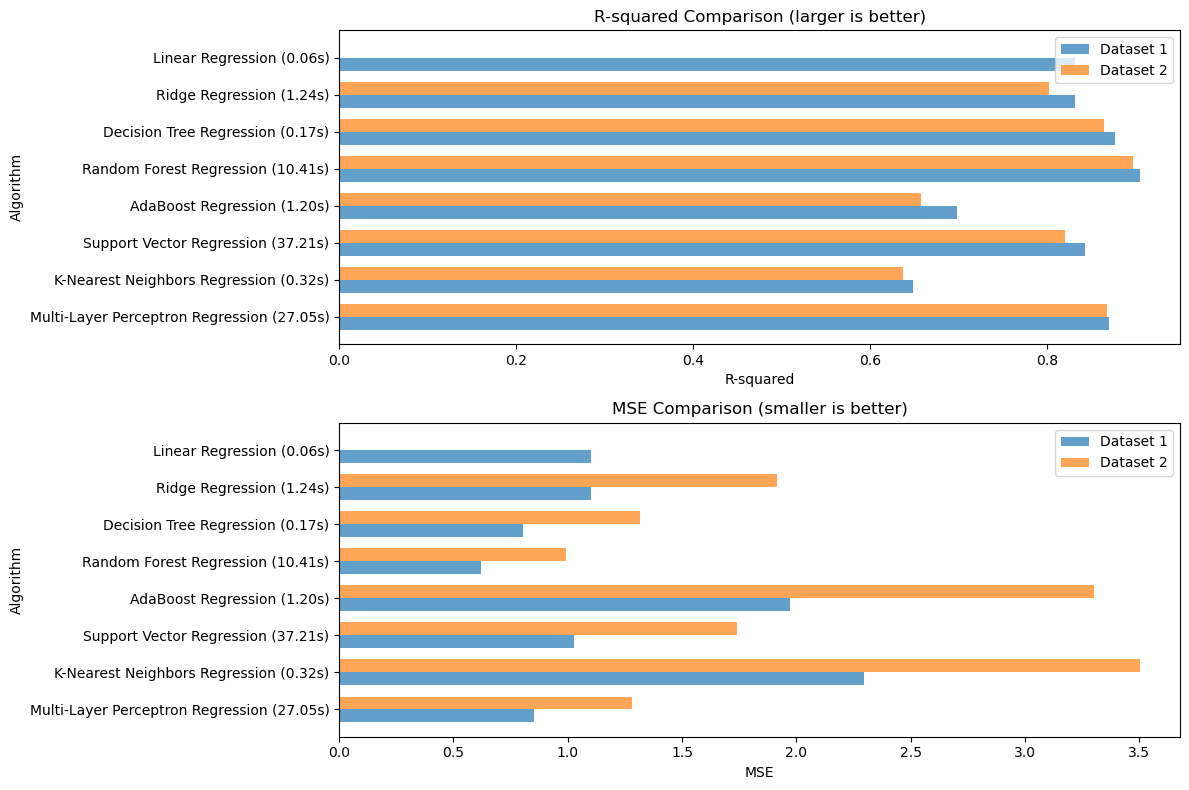

In [27]:
filtered_results = results.copy()
for item in filtered_results:
    if item['algorithm'] == 'Linear Regression':
        item['r2_ds2'] = 0
        item['mse_ds2'] = 0

plot_results(filtered_results)

Based on those results, Random Forest Regression achieves the best results. It will be performed once again and the predicted values will be compared to the real values.

In [28]:
rf_ds1 = RandomForestRegressor(n_estimators=100, random_state=0)
rf_ds1.fit(X_train_ds1, y_train_ds1)
y_pred_ds1 = rf_ds1.predict(X_test_ds1)

rf_ds2 = RandomForestRegressor(n_estimators=100, random_state=0)
rf_ds2.fit(X_train_ds2, y_train_ds2)
y_pred_ds2 = rf_ds2.predict(X_test_ds2)

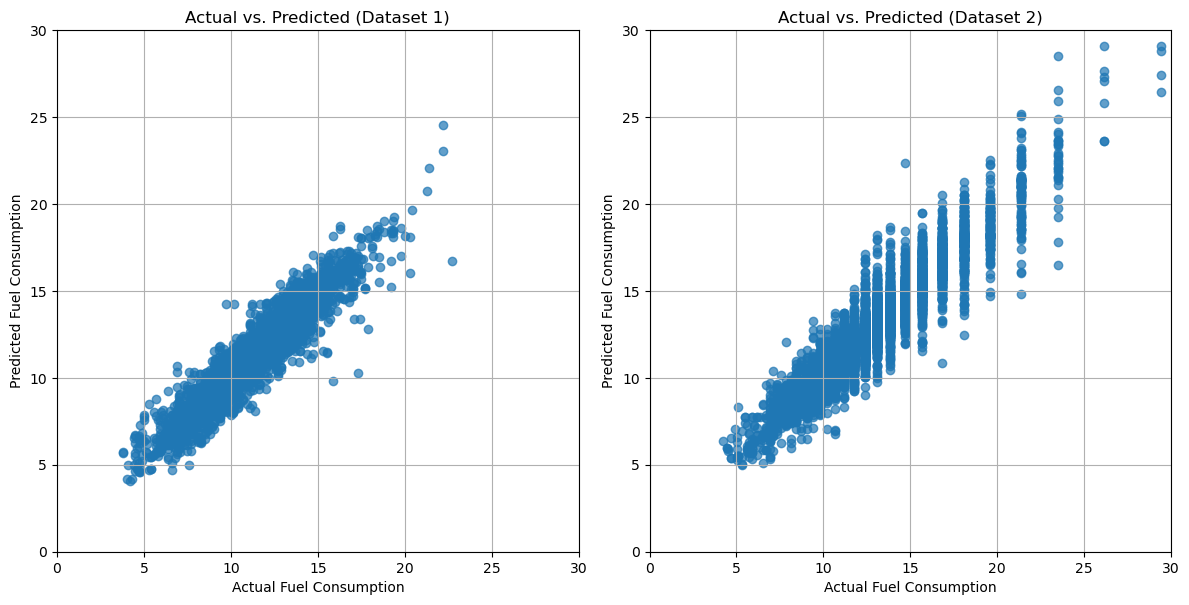

In [29]:
# Scatter plot for Dataset 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_ds1, y_pred_ds1, alpha=0.7)
plt.title('Actual vs. Predicted (Dataset 1)')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio
plt.xlim(0, 30)  # Set x-axis limit
plt.ylim(0, 30)  # Set y-axis limit

# Scatter plot for Dataset 2
plt.subplot(1, 2, 2)
plt.scatter(y_test_ds2, y_pred_ds2, alpha=0.7)
plt.title('Actual vs. Predicted (Dataset 2)')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio
plt.xlim(0, 30)  # Set x-axis limit
plt.ylim(0, 30)  # Set y-axis limit

plt.tight_layout()
plt.show()

In [30]:
# Calculate absolute percentage deviation for each sample
absolute_percentage_deviation_d1 = np.abs((y_test_ds1 - y_pred_ds1) / y_test_ds1) * 100
absolute_percentage_deviation_d2 = np.abs((y_test_ds2 - y_pred_ds2) / y_test_ds2) * 100
# Calculate the average percentage deviation
average_percentage_deviation_ds1 = np.mean(absolute_percentage_deviation_d1)
average_percentage_deviation_ds2 = np.mean(absolute_percentage_deviation_d2)

print(f'Dataset 1 Average Percentage Deviation: {average_percentage_deviation_ds1:.2f}%')
print(f'Dataset 2 Average Percentage Deviation: {average_percentage_deviation_ds2:.2f}%')

Dataset 1 Average Percentage Deviation: 5.48%
Dataset 2 Average Percentage Deviation: 5.84%



## Results And Discussion

The results are quite good and I personally think that ~5.5% average prediction deviation is a good result.

Taking into account the exclusion of the anomaly with Linear Regression's R-squared and MSE scores for dataset 2, one can draw the following conclusions:

* Dataset 2 is easier to predict with all algorithms
* Linear Regression is the fastest and has resonably good scores
* Decision Tree Regression is sligthly slower than Linear Regression, but has a better score, so in this case, it is worth using it without a big performance tradeoff
* Adaboost Regression and K-Nearest Neighbors have too low scores and are not suitable for these datasets
* Support Vector Regression and Multi-Layer Perceptron Regression are very slow
* Multi-Layer Perceptron Regression has better scores than Support Vector Regression
* Finally, Random Forest Regression has the best overall score for both datasets and its performance is slow, but acceptable

Some of these alforithms use single core and some are multi-core friendly. This means that the proportions between their run-time will vary depending on the number of available cores.

My personal favorite is Random Forest Regression as it has acceptable runtime and produces the best results.
